In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.pipeline import make_pipeline

# Получение и первичное исследование данных (EDA, exploratory data analyze)

<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Юрий</p>
<p>к.ф.-м.н., доцент кафедры ИТЗИ УрГУПС (Екатеринбург)</p>
<p>yuchernyshov@usurt.ru</p>

# Оглавление <a name='toc'></a>
<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#sources'>Источники данных</a></li>
    <ol>
        <li> <a href='#text_files'>Текстовые файлы</a> </li>
        <li> <a href='#xml'>xml</a> </li>
        <li><a href='#api'>API, JSON</a></li>
        <li><a href='#databases'>Базы данных</a></li>
        <li><a href='#datasets'>Стандартные датасеты kaggle, sklearn, MNIST</a></li>
        <li><a href='#other'>Результаты измерений, IoT, Twitter, социальные сети</a></li>
    </ol>    
<li><a href='#tools'>Инструменты анализа данных</a></li>
<li><a href='#eda'>Этапы предварительного (разведочного) анализа данных</a>
<ol>
<li><a href='#first_look'>Предварительное изучение данных: правильность получения, природа, целостность, актуальность, адекватность</a>
</li>
<li><a href='#connections'>Выявление в данных взаимосвязей, кластеров</a></li>
<li><a href='#anomaly'>Анализ аномалий - причина, повторяемость, угроза для выборки</a></li>
<li><a href='#scale'>Шкалирование признаков</a></li>
<li><a href='#importance'>Выявление наиболее актуальных параметров</a></li>
<li><a href='#combination'>Комбинирование признаков</a></li>
<li><a href='#gipotese'>Проверка основных гипотез</a></li>
</ol>    
<li><a href='#models'>Модели</a></li>
<li><a href='#links'>Ссылки</a></li>
<li><a href='#hometask'>Задание для самостоятельной работы</a></li>    
</ol>

# Введение <a name='intro'></a>

Для работы с данными нужны сами данные :-) Большинство рабочего времени специалиста по работе с данными уходит на получение, очистку, преобразование, предварительное исследование данных. От качества этой предварительной работы зависит качество, скорость, результативность работы моделей, использующих данные (Garbage-In-Garbage-Out). 

В лекции рассмотрены способы (источники) получения данных и этапы разведочного анализа данных (EDA).

<a href='#toc'>Назад к Оглавлению</a>

# Источники данных <a name='sources'></a>

Самый нерациональный (но тем не менее часто применяющийся и в настоящее время) способ создания данных - ручное внесение информации (заполнение таблиц, создание отчетов, "набивалки"). Однако все чаще появляются проекты с автоматизированным и унифицированным способом сбора, хранения, преобразования данных (что гораздо эффективнее).

Рассмотрим некоторые из стандартных способов получения данных.
- Текстовые файлы
- xml
- API, JSON
- Базы данных
- OLAP-кубы
- Другие источники: результаты измерений, IoT, Twitter, социальные сети

Кроме того, создано множество наборов данных (dataset), применяющихся как для обучения, так и для глобальных исследований
- Датасеты sklearn
- Датасеты kaggle (kaggle.com)
- MNIST

<a href='#toc'>Назад к Оглавлению</a>

## Текстовые файлы <a name='text_files'></a>

Чтение и запись из текстового файла. Файл необходимо открыть в соответствующем режиме ('r' - read/чтение, 'w' - write/запись, 'a' - append/добавление)

In [2]:
with open('data.txt', 'w') as f: f.write('1,2,3\n')
f.close()
with open('data.txt', 'r') as f: s = f.read()
f.close()
print(s, end="")

1,2,3


csv - текстовые файлы специального вида, данные разделены специальным символом, чаще всего запятой (comma separated value).

In [3]:
with open('data.txt', 'a') as f: f.write('5,6,7\n')
f.close()
df = pd.read_csv('data.txt', names="ABC")
display(df)

,A,B,C
0,1,2,3
1,5,6,7


<a href='#toc'>Назад к Оглавлению</a>

## xml <a name='xml'></a>


xml (extensible markup language) - язык разметки данных с использованием специальный блоков, обозначаемых тегами. Пример xml файла:

In [4]:
%%html
<xmp>
<?xml version="1.0" ?>
<Appointments>
    <appointment>
        <begin>1181251680</begin>
        <uid>040000008200E000</uid>
        <alarmTime>1181572063</alarmTime>
    </appointment>
</Appointments>
</xmp>

Существуют различные стандартные билиотеки для работы с xml, например, в Python это minidom, ElementTree, BeautifulSoap

<a href='#toc'>Назад к Оглавлению</a>

## API, JSON <a name='api'></a>

Объектная нотация JavaScript Object Notation используется при сериализации (преобразованию к виду, похожему на словарь).

In [5]:
import json
d = {'personal data': {   
                        'surname': 'Ivanov', 
                        'name': 'Ivan'
                    },
    'age': 42, 'height': 171, 'weight': 80}
print(d)
s = json.dumps(d)
print(s)
d = json.loads(s)
print(d)

{'personal data': {'surname': 'Ivanov', 'name': 'Ivan'}, 'age': 42, 'height': 171, 'weight': 80}
{"personal data": {"surname": "Ivanov", "name": "Ivan"}, "age": 42, "height": 171, "weight": 80}
{'personal data': {'surname': 'Ivanov', 'name': 'Ivan'}, 'age': 42, 'height': 171, 'weight': 80}


Экспортируем данные из открытого API github.com

In [6]:
import requests
endpoint = 'https://api.github.com/users/daniil-batalov/repos'
repos = json.loads(requests.get(endpoint).text)
for elem in repos:
    print(elem['name'])

DataMasters_Challenge
Information-Systems-Course-USURT
USURT-Maga


<a href='#toc'>Назад к Оглавлению</a>

## Базы данных <a name='databases'></a>


Стандартным источником информации в системах, работающих продуктивной среде, являются базы данных - хранилища большого объема информации. В зависимости от прикладных задач для хранения данных может быть выбрана соответствующая база данных. Для работы с базами данных используют SQL запросы.

Примеры SQL запросов

SELECT model, speed, hd from PC WHERE price<500

select model,price from Printer 
WHERE price=(SELECT MAX(price) from Printer)

SELECT DISTINCT Product.type, Laptop.model, Laptop.speed FROM Product
JOIN Laptop ON Laptop.model=Product.model
WHERE speed < ANY (SELECT MIN(speed) FROM PC)

In [7]:
import sqlite3
conn = sqlite3.connect("mydb.db")
c = conn.cursor()
c.execute("select * from sqlite_master;")
c.fetchall()

[]

<a href='#toc'>Назад к Оглавлению</a>

## Стандартные датасеты <a name='datasets'></a>

Существует большое количество созданных наборов данных (называемых датасетами, datasets), предназначенными как для тренировок, так и для решения прикладных задач.

#### kaggle.com

Ресурс https://www.kaggle.com/datasets содержит большое количество данных, один из критериев оценки участников сообщества kaggle - оценка размещенных участниками датасетов. Содержит как тренировочные данные, так и данные для решения глобальных задач (предсказание объема продаж Walmart, предсказание динамики распространения коронавируса)

#### sklearn

<a name='data_sklearn'></a>
    
Также много заранее подготовленных датасетов в библиотеке sklearn (загружаются с использованием from sklearn import datasets).    
<ul>
    <li>load_digits() - 1797 образцов рукописных цифр, для тренировки алгоритмов классификации изображений</li>
    <li>load_boston() - 697 образцов цен на жилье, для тренировки алгоритмов регрессии</li>
    <li>load_iris() - 150 образцов измерений цветка ириса, для тренировки алгоритмов классификации</li>
</ul>

Также можно создать наборы данных самостоятельно с использованием функций sklearn make_regression, make_classification, make_blobs

In [8]:
from sklearn.datasets import make_friedman1
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
print(len(X), len(X[0]))

50 10


С помощью функции sklear.dataset.make_circles можно создать множество точек.

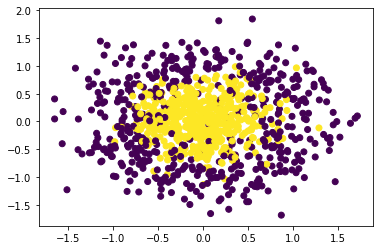

In [9]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
points, color = make_circles(n_samples=1000, shuffle=True, noise=0.3, random_state=1, factor=0.3)
plt.scatter(np.array(points)[:,0],np.array(points)[:,1], c=color)
plt.show()

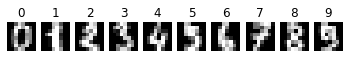

In [10]:
from sklearn.datasets import load_digits
data = load_digits()
fig, ax = plt.subplots(1,10)
for i in range(10):
    ax[i].imshow(data.data[i].reshape(8,8), cmap='gray')
    ax[i].grid(False)
    ax[i].axis(False)
    ax[i].set_title(data.target[i])

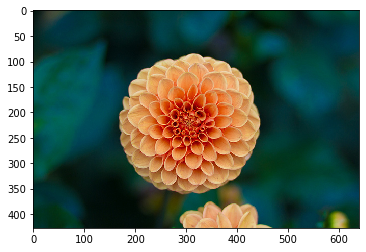

In [11]:
from sklearn.datasets import load_sample_images
data = load_sample_images()
plt.imshow(data.images[1])

<a href='#toc'>Назад к Оглавлению</a>

## Результаты измерений, IoT, Twitter, социальные сети <a name='other'></a>

Через открытые источники можно получать информацию для анализа из социальных сетей, twitter и т.п.

Перечень популярных API (например, прогноз погоды, фильмы, финансовый анализ) для Python можно найти здесь: https://rapidapi.com/collection/list-of-python-apis

<a href='#toc'>Назад к Оглавлению</a>

# Инструменты анализа данных <a name='tools'></a>

<ol>
<li>Системы бизнес-аналитики BI</li>
<li>Различные математические пакеты программ: Statistica, MathCad, Maple,...</li>
<li>Встроенные инструменты фреймворков (PostgreSQL, Oracle)</li>
<li>Excel</li>
<li>Python (pandas, matplotlib, numpy, sklearn)</li>
</ol>

<a href='#toc'>Назад к Оглавлению</a>

# Этапы предварительного (разведочного) анализа данных <a name='eda'></a>

#### Типовой набор данных для демонстрации работы методов

In [12]:
num = 100
df = pd.DataFrame({
        'Date': pd.date_range('20130102', periods=num, freq='1w'),
        'Visitors': np.random.randint(0,10, num),
        'Income': np.random.random(num)*100,
        'Type': pd.Categorical(np.random.choice(['Regular', 'Unique', 'Irregular', ''], size=num)),
        'Par1': np.random.choice(np.r_[np.linspace(-10,10,20), np.NaN*10], size=num)
                  })
df

,Date,Visitors,Income,Type,Par1
0,2013-01-06,6,93.161248,Unique,-6.842105
1,2013-01-13,5,15.935230,Unique,-5.789474
2,2013-01-20,5,66.707159,Irregular,4.736842
3,2013-01-27,5,32.226480,Irregular,-5.789474
4,2013-02-03,9,72.021866,Unique,4.736842
...,...,...,...,...,...
95,2014-11-02,7,87.202280,Regular,10.000000
96,2014-11-09,5,35.778239,Regular,-8.947368
97,2014-11-16,5,97.450982,,4.736842
98,2014-11-23,5,57.627046,Irregular,-10.000000


In [13]:
df.head(2)

,Date,Visitors,Income,Type,Par1
0,2013-01-06,6,93.161248,Unique,-6.842105
1,2013-01-13,5,15.935230,Unique,-5.789474


In [14]:
df.tail(1)

,Date,Visitors,Income,Type,Par1
99,2014-11-30,7,76.787547,Regular,-7.894737


In [15]:
print("df.shape: {}, rows: {}, columns: {}".format(df.shape, df.shape[0], df.shape[1]))

df.shape: (100, 5), rows: 100, columns: 5


In [16]:
df.info(), df.Par1.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
Date        100 non-null datetime64[ns]
Visitors    100 non-null int32
Income      100 non-null float64
Type        100 non-null category
Par1        94 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int32(1)
memory usage: 3.0 KB


(None, 6)

In [17]:
df.describe()

,Visitors,Income,Par1
count,100.000000,100.000000,94.000000
mean,4.140000,47.593174,-0.425532
std,2.871033,29.340680,6.145738
min,0.000000,0.596139,-10.000000
25%,1.000000,23.368837,-5.789474
50%,4.500000,43.693304,-0.526316
75%,7.000000,73.144188,4.736842
max,9.000000,98.980999,10.000000


<a href='#toc'>Назад к Оглавлению</a>

## Предварительное изучение данных: правильность получения, природа, целостность, актуальность, адекватность <a name='first_look'></a>

#### Пример некорректных данных

<table border=1>
    <thead><th>Дата</th><th>ФИО</th><th>Результат</th></thead>
    <tr>
        <td>29 декабря 2019</td><td>Иванов И.И.</td><td>14.01</td>
    </tr>
    <tr>
        <td>29 декабря 1019</td><td>Иванов Ваня</td><td>12,02</td>
    </tr>
    <tr>
        <td>31 февраля 2020</td><td></td><td>14</td>
    </tr>
    <tr>
        <td>01 апреля 2020</td><td>Петров П.П.</td><td>-100</td>
    </tr>
</table>

Типичные ошибки: некорректные даты, разные форматы ФИО (отсутствует отчество), разные форматы чисел, пропущенные данные.

#### Методы pandas

    
<ol>
<li>Получить данные (создать pd.DataFrame)</li>
    <ul>
        <li>Файлы: <code>pd.read_csv()</code>, <code>pd.read_xls()</code></li>
        <li>API</li>
        <li>xml, html, JSON</li>
    </ul>    
<li>Общая информация о данных</li>
    <ul>
        <li>df.info() - общая информация о таблице (индексы, строки, типы, ненулевые значения),</li>
        <li>df.shape() - размеры, </li>
        <li>df.columns(), df.index() - колонки, индексы</li>
        <li>df.describe(), df.describe(include=['object', 'bool']) - общая статистическая информация по численным значениям</li>
    </ul>
<li>Агрегированная информация о данных</li>
<ul>
    <li>df.value_counts() - подсчет частотности значений для типов Categorical и Boolean,</li>
    <li>df.sort_values(by='название столбца', ascending=False/True) - сортировка,</li>
    <li>df.mean(), .min(), .max(), .std(), .var(), .count() - агрегационные функции,</li>
    <li>groupby, crosstab, pivot_table - сводные таблицы</li>
</ul>
</ol>

#### Типы данных, пропущенные значения

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
Date        100 non-null datetime64[ns]
Visitors    100 non-null int32
Income      100 non-null float64
Type        100 non-null category
Par1        94 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int32(1)
memory usage: 3.0 KB


#### Информация о столбцах df.columns

In [19]:
print(df.columns)
for vColName in df.columns[1::2]:
    print("{}: {}".format(vColName, df[vColName].unique()))

Index(['Date', 'Visitors', 'Income', 'Type', 'Par1'], dtype='object')
Visitors: [6 5 9 1 3 0 4 2 8 7]
Type: [Unique, Irregular, Regular, ]
Categories (4, object): [Unique, Irregular, Regular, ]


#### Статистическая информация

In [20]:
df

,Date,Visitors,Income,Type,Par1
0,2013-01-06,6,93.161248,Unique,-6.842105
1,2013-01-13,5,15.935230,Unique,-5.789474
2,2013-01-20,5,66.707159,Irregular,4.736842
3,2013-01-27,5,32.226480,Irregular,-5.789474
4,2013-02-03,9,72.021866,Unique,4.736842
...,...,...,...,...,...
95,2014-11-02,7,87.202280,Regular,10.000000
96,2014-11-09,5,35.778239,Regular,-8.947368
97,2014-11-16,5,97.450982,,4.736842
98,2014-11-23,5,57.627046,Irregular,-10.000000


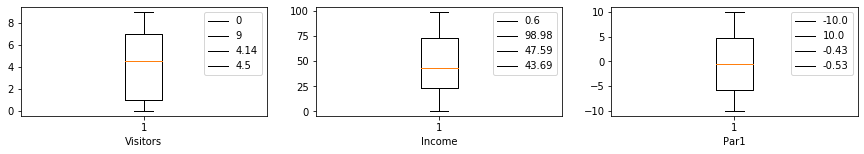

In [21]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(2)
for i, vColName in enumerate(['Visitors', 'Income','Par1']):
    ax[i].boxplot(df[vColName].dropna())
    ax[i].set_xlabel(vColName)  
    ax[i].legend([round(f(df[vColName].dropna()),2) for f in [min,max,np.mean,np.median]],loc=1)
plt.show()

In [22]:
df.describe()

,Visitors,Income,Par1
count,100.000000,100.000000,94.000000
mean,4.140000,47.593174,-0.425532
std,2.871033,29.340680,6.145738
min,0.000000,0.596139,-10.000000
25%,1.000000,23.368837,-5.789474
50%,4.500000,43.693304,-0.526316
75%,7.000000,73.144188,4.736842
max,9.000000,98.980999,10.000000


In [23]:
df

,Date,Visitors,Income,Type,Par1
0,2013-01-06,6,93.161248,Unique,-6.842105
1,2013-01-13,5,15.935230,Unique,-5.789474
2,2013-01-20,5,66.707159,Irregular,4.736842
3,2013-01-27,5,32.226480,Irregular,-5.789474
4,2013-02-03,9,72.021866,Unique,4.736842
...,...,...,...,...,...
95,2014-11-02,7,87.202280,Regular,10.000000
96,2014-11-09,5,35.778239,Regular,-8.947368
97,2014-11-16,5,97.450982,,4.736842
98,2014-11-23,5,57.627046,Irregular,-10.000000


In [24]:
print(df.groupby('Type')['Visitors'].min())
print(df.groupby('Type')['Income'].sum())

Type
             0
Irregular    0
Regular      0
Unique       0
Name: Visitors, dtype: int32
Type
             1542.456046
Irregular    1151.733032
Regular      1100.171190
Unique        964.957111
Name: Income, dtype: float64


#### pd.crosstab

Показывает для двух категориальных типов количество пересечений их значений.

In [25]:
pd.crosstab(df['Type'], df['Visitors'])

Visitors,0,1,2,3,4,5,6,7,8,9
Type,,,,,,,,,,
,7,4,1,4,5,2,2,3,2,2
Irregular,3,3,3,5,0,6,3,1,0,2
Regular,4,1,1,1,1,7,1,5,2,1
Unique,2,2,1,0,2,1,2,5,0,3


#### pd.pivot_table

Строит агрегирующие статистические таблицы - столбцы и колонки объединяются в группы по определенным признакам и для этих групп вычисляются агрегационные функции (сумма, минимум, максимум всех значений в группе и т.п.)

In [26]:
df

,Date,Visitors,Income,Type,Par1
0,2013-01-06,6,93.161248,Unique,-6.842105
1,2013-01-13,5,15.935230,Unique,-5.789474
2,2013-01-20,5,66.707159,Irregular,4.736842
3,2013-01-27,5,32.226480,Irregular,-5.789474
4,2013-02-03,9,72.021866,Unique,4.736842
...,...,...,...,...,...
95,2014-11-02,7,87.202280,Regular,10.000000
96,2014-11-09,5,35.778239,Regular,-8.947368
97,2014-11-16,5,97.450982,,4.736842
98,2014-11-23,5,57.627046,Irregular,-10.000000


Найти сумму выручки ('Income') для конкретных значений Type и Visitor.

In [27]:
df.pivot_table(index='Type', columns='Visitors', values='Income', aggfunc={np.sum}, fill_value=0)

sum                                                  \
Visitors            0           1           2           3           4   
Type                                                                    
           315.414721  132.180712   94.530130  246.710924  162.575403   
Irregular  119.680854  148.736775  111.084984  233.291123    0.000000   
Regular    160.132381   24.829673    1.964286   23.817551   43.637550   
Unique     107.365069  137.497713    9.470530    0.000000   34.283580   

                                                                       
Visitors            5           6           7           8           9  
Type                                                                   
           114.541812  112.779834  124.236739  112.568812  126.916959  
Irregular  337.582588  123.786444   49.643286    0.000000   27.926979  
Regular    390.929783   52.877262  306.436337   76.011516   19.534851  
Unique      15.935230  152.669942  273.656842    0.000000  234.078204

<a href='#toc'>Назад к Оглавлению</a>

## Выявление в данных взаимосвязей, кластеров <a name='connections'></a>

#### Парадокс Симпсона

Выявленные закономерности в отдельных частях выборки могут кореннцм образом отличаться от аналогичных закономерностей для всей выборки, что может вводить исследователей данных в заблуждение. Ниже пример, когда для каждой из двух частей (синей и желтой) выборки корреляция отрицательная, а в целом для выборки (зеленая) - положительная.

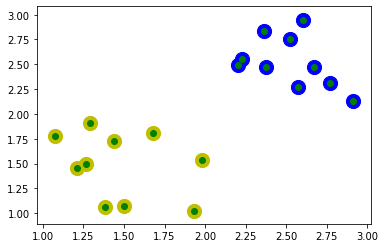

In [28]:
np.random.seed(7)
Yellows = np.random.random(size=(10,2))+1
Blues = np.random.random(size=(10,2))+2
Greens = np.r_[Yellows, Blues]
plt.scatter(Yellows[:, 0], Yellows[:, 1], color="y", s=200)
plt.scatter(Blues[:, 0], Blues[:, 1], color="b", s=200)
plt.scatter(Greens[:,0], Greens[:,1], color="g")
plt.show()

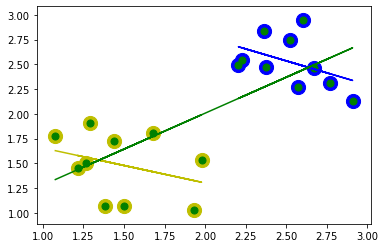

In [29]:
plt.scatter(Yellows[:, 0], Yellows[:, 1], color="y", s=200)
plt.scatter(Blues[:, 0], Blues[:, 1], color="b", s=200)
plt.scatter(Greens[:, 0], Greens[:, 1], color="g", s=50)

model = LinearRegression()

model.fit(Blues[:, 0].reshape(-1, 1), Blues[:, 1])
plt.plot(Blues[:, 0], model.predict(Blues[:, 0].reshape(-1,1)), color="b")

model.fit(Yellows[:, 0].reshape(-1, 1), Yellows[:, 1])
plt.plot(Yellows[:, 0], model.predict(Yellows[:, 0].reshape(-1, 1)), color="y")

model.fit(Greens[:, 0].reshape(-1, 1), Greens[:, 1])
plt.plot(Greens[:, 0], model.predict(Greens[:, 0].reshape(-1, 1)), color="g")

plt.show()

#### Корреляция

In [30]:
df.corr()

,Visitors,Income,Par1
Visitors,1.000000,0.126795,-0.166828
Income,0.126795,1.000000,0.014422
Par1,-0.166828,0.014422,1.000000


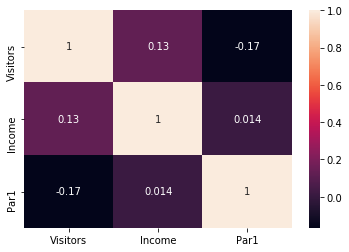

In [31]:
sns.heatmap(df.corr(), annot=True)

<a href='#toc'>Назад к Оглавлению</a>

## Анализ аномалий - причина, повторяемость, угроза для выборки <a name='anomaly'>


#### pyplot.boxplot

Удобное средство визуализации данных. Можно увидеть минимум, максимум, медиану, 25% и 75% перцентили, выбросы.

[ -7  -9  -7  -9   9  -6   9  -9  -5  -1   7  -8   9   8   8  -7   1   5
   6   2   1  -1  -1   2  -7   4   4   5  -7   6  -6   1  -2   1   5   3
   8  -3  -7   2   2   5  -2  -4  -4   2  -3   7   0   5  -5  -6  -1  -1
 -10  -8   2  -4  -2  -8   0   4   7  -4   0   7  -5   5   7   2  -1  -2
   5  -5  -1  -6   2  -1   1  -4  -9   1   9   2   2   3  -6  -3  -1  -4
   5   1   8   6  -5  -7   3 -10  -9   3 -25  25]


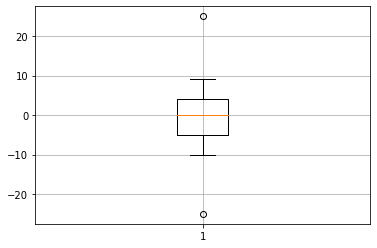

In [32]:
spikes = [-25, 25]
x = np.r_[np.random.randint(low=-10, high=10, size=100), spikes]
print(x)
plt.boxplot(x)
plt.grid(True)
plt.show()

#### Влияние выбросов на качество модели

Причиной выброса может быть неисправность прибора, ошибка измерения и т.п. В том случае если значение выброса существенно отличается от остальных значений - он может сильно исказить общую картину.

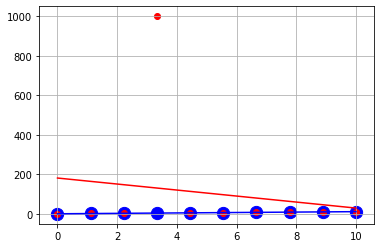

In [33]:
x = np.linspace(0, 10, 10)
y = x + 3*np.random.random(10)

model = LinearRegression()

model.fit(x.reshape(-1, 1), y)
result = model.predict(x.reshape(-1,1))
plt.scatter(x, y, c='b', s=150)
plt.plot(x, result, c='b')

y[3] = 1000
model.fit(x.reshape(-1, 1), y)
result = model.predict(x.reshape(-1,1))
plt.scatter(x, y, c='r')
plt.plot(x, result, c='r')

plt.grid(True)
plt.show()

В зависимости от конкретной ситуации выбросы можно удалять из общей выборки, либо заменять средним значением.

<a href='#toc'>Назад к Оглавлению</a>

## Шкалирование признаков <a name='scale'></a>

#### Заменить значения из диапазона (0,100) значениями из диапазона (0,10)

In [34]:
np.random.seed(1)
a = np.random.randint(1, 101, 100)
print(a)

# sklearn.preprocessing.MinMaxScaler()
minmax_scale = MinMaxScaler(feature_range=(0,10))
a_scaled = minmax_scale.fit_transform(a.reshape(-1,1))
print(np.round(a_scaled.ravel(),2))

[38 13 73 10 76  6 80 65 17  2 77 72  7 26 51 21 19 85 12 29 30 15 51 69
 88 88 95 97 87 14 10  8 64 62 23 58  2  1 61 82  9 89 14 48 73 31 72  4
 71 22 50 58  4 69 25 44 77 27 53 81 42 83 16 65 69 26 99 88  8 27 26 23
 10 68 24 28 38 58 84 39  9 33 35 11 24 16 88 26 72 93 75 63 47 33 89 24
 56 66 78  4]
[ 3.78  1.22  7.35  0.92  7.65  0.51  8.06  6.53  1.63  0.1   7.76  7.24
  0.61  2.55  5.1   2.04  1.84  8.57  1.12  2.86  2.96  1.43  5.1   6.94
  8.88  8.88  9.59  9.8   8.78  1.33  0.92  0.71  6.43  6.22  2.24  5.82
  0.1   0.    6.12  8.27  0.82  8.98  1.33  4.8   7.35  3.06  7.24  0.31
  7.14  2.14  5.    5.82  0.31  6.94  2.45  4.39  7.76  2.65  5.31  8.16
  4.18  8.37  1.53  6.53  6.94  2.55 10.    8.88  0.71  2.65  2.55  2.24
  0.92  6.84  2.35  2.76  3.78  5.82  8.47  3.88  0.82  3.27  3.47  1.02
  2.35  1.53  8.88  2.55  7.24  9.39  7.55  6.33  4.69  3.27  8.98  2.35
  5.61  6.63  7.86  0.31]


#### Преобразовать данные, чтобы среднее значение было 0, а дисперсия - 1

<BarContainer object of 100 artists>

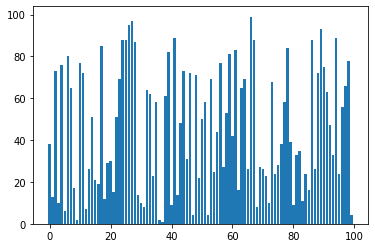

In [35]:
plt.bar([i for i in range(len(a))], a)

In [36]:
# sklearn.preprocessing.StandardScaler()
a_norm_scaled = StandardScaler().fit_transform(a.reshape(-1,1))

<BarContainer object of 100 artists>

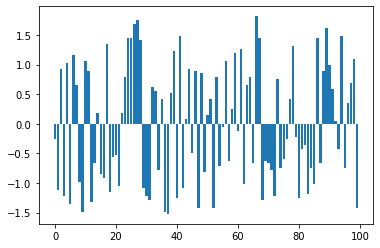

In [37]:
plt.bar([i for i in range(len(a))], a_norm_scaled.flatten())

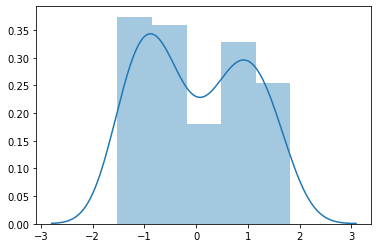

In [38]:
sns_plot = sns.distplot(a_norm_scaled)
fig = sns_plot.get_figure()

In [39]:
print(a_norm_scaled.mean(), a_norm_scaled.var())

-1.5543122344752193e-17 1.0000000000000002


<a href='#toc'>Назад к Оглавлению</a>

## Выявление наиболее актуальных параметров <a name='importance'></a>


<a href='#toc'>Назад к Оглавлению</a>

## Комбинирование признаков, конструирование новых признаков <a name='combination'></a>

#### Линейные комбинации признаков

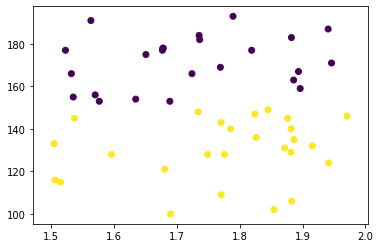

In [40]:
df = pd.DataFrame({'Рост (м)': np.random.random(50)*0.5+1.5, 
                   'Вес (кг)': np.random.randint(100, 200, 50)})

from sklearn.cluster import KMeans

estimator = KMeans(n_clusters=2)
estimator.fit(df.values)

plt.scatter(df['Рост (м)'], df['Вес (кг)'], c=estimator.labels_)
plt.show()

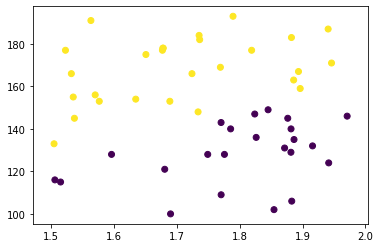

In [41]:
df['Коэффициент'] = df['Рост (м)']*100 / df['Вес (кг)']
estimator.fit(df['Коэффициент'].values.reshape(-1, 1))

plt.scatter(df['Рост (м)'], df['Вес (кг)'], c=estimator.labels_)


In [42]:
#preprocessing.PolimomialFeatures()

In [43]:
#preprocessing.FunctionTransformer

#### Группировка признаков с помощью кластеризации

In [44]:
from sklearn.cluster import KMeans

In [45]:
a = np.array([np.random.randint(1,100) for _ in range(10)])
print(a)
print(KMeans(3).fit(a.reshape(-1,1)).predict(a.reshape(-1,1)))

[ 4 57 89 81 47 55 80 72 15 78]
[1 2 0 0 2 2 0 0 1 0]


<a href='#toc'>Назад к Оглавлению</a>

## Проверка основных гипотез <a name='gipotese'></a>

<ol>
    <li>Критерий Пирсона</li>
    <li>Проверка законов распределения</li>
    <li>A/B тестирование</li>
</ol>

In [46]:
df.columns

Index(['Рост (м)', 'Вес (кг)', 'Коэффициент'], dtype='object')

In [47]:
from scipy.stats import pearsonr
# тест корреляции Пирсона
corr, p = pearsonr(df['Рост (м)'], df['Вес (кг)'])
print(corr, p)

# тест Стьюдента (различие образцов)
from scipy.stats import ttest_ind
stat, p = ttest_ind(df['Рост (м)'], df['Вес (кг)'])
print(stat, p)

-0.043109229541424196 0.7662706802555226
-42.00876203871578 1.7757290227122042e-64


<a href='#toc'>Назад к Оглавлению</a>

# Модели <a name='models'></a>

#### Создание пайплайнов (pipelines)

Для объединения последовательности стандартных действий по обработке данных (например, удаление пустых значений, масштабирование и построение линейной регрессии) используют пайплайны. В библиотеке sklearn.pipeline.make_pipeline.

In [48]:
xs = np.array([1, 2, 3, 4])
ys = xs**2 + np.random.random(4)*5

In [49]:
# sklearn.pipeline.make_pipeline
pipeline0 = make_pipeline(LinearRegression())
pipeline1 = make_pipeline(MinMaxScaler(), LinearRegression())
pipeline2 = make_pipeline(StandardScaler(), LinearRegression())

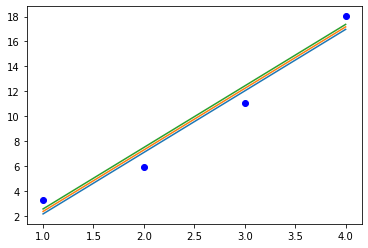

In [50]:
plt.scatter(xs, ys, c='b')
plt.plot(xs, pipeline0.fit(xs.reshape(-1,1), ys).predict(xs.reshape(-1,1)))
plt.plot(xs, pipeline1.fit(xs.reshape(-1,1), ys).predict(xs.reshape(-1,1))+0.2)
plt.plot(xs, pipeline2.fit(xs.reshape(-1,1), ys).predict(xs.reshape(-1,1))+0.4)

#### Разработка и применение начальных простых моделей

Для обработанных данных требуется построить простую модель, чтобы убедиться в возможности использовать данные для более сложных моделей.

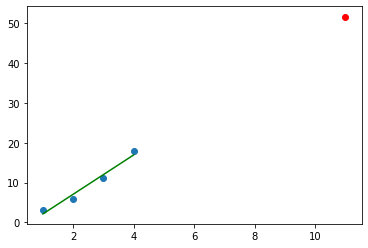

In [51]:
linreg = LinearRegression()

linreg.fit(np.array(xs).reshape((-1,1)), ys)
plt.plot(xs, linreg.predict(np.array(xs).reshape(-1,1)), c='g')

plt.scatter(xs, ys)
plt.scatter(11, linreg.predict(np.array([11]).reshape(-1,1)), c='r')

plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Ссылки <a name='links'></a>

numpy.org

pandas.pydata.org

scikit-learn.org

kaggle.com

<a href='#toc'>Назад к Оглавлению</a>

# Задание для самостоятельной работы <a name='hometask'>

Провести разведочный анализ данных задачи "Titanic: Machine Learning from Disaster" (https://www.kaggle.com/c/titanic)

Ответить на вопросы теста 

<a href='#toc'>Назад к Оглавлению</a>